<a href="https://colab.research.google.com/github/pengfei093/machine-learning-with-pytorch-and-scikit-learn/blob/main/Chapter9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Study node of Chapter 9.

In [2]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
'Central Air', 'Total Bsmt SF', 'SalePrice']

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
sep='\t',
usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [5]:
df.shape

(2930, 6)

In [6]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [7]:
df.isnull().sum()

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,1
Central Air,0
Gr Liv Area,0
SalePrice,0


In [10]:
df = df.dropna(axis=0)
df.isnull().sum()

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,0
Central Air,0
Gr Liv Area,0
SalePrice,0


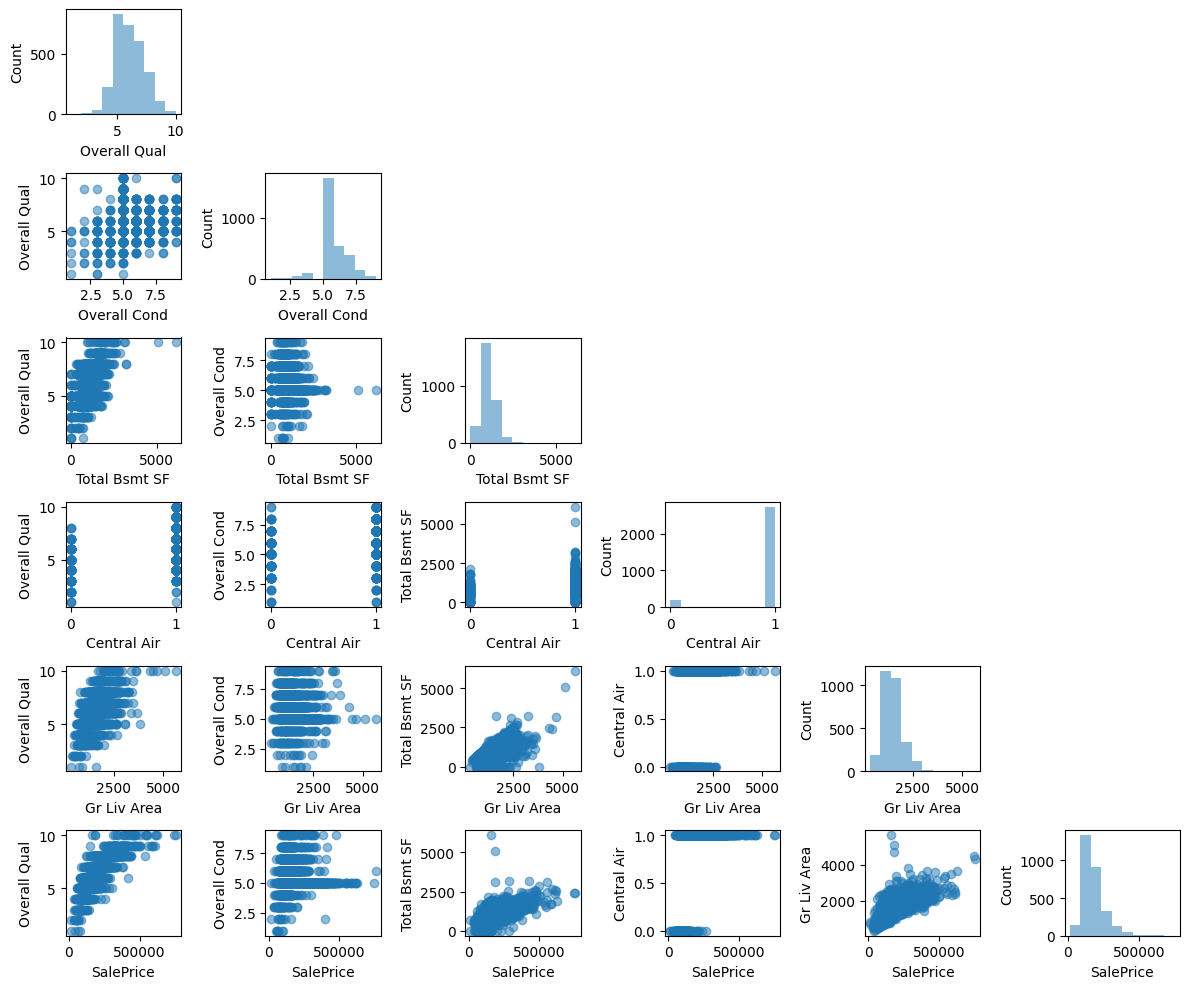

In [11]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12, 10),
names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

Note that in contrast to common belief, training a linear regression model does not require
that the explanatory or target variables are normally distributed. The normality
assumption is only a requirement for certain statistics and hypothesis tests that are beyond
the scope of this book

### Pearson 相关系数公式  

$$
r_{xy} \;=\;
\frac{\displaystyle\sum_{i=1}^{n}(x_i-\mu_x)(\,y_i-\mu_y)}
     {\displaystyle\sqrt{\sum_{i=1}^{n}(x_i-\mu_x)^2}\;
      \sqrt{\sum_{i=1}^{n}(y_i-\mu_y)^2}}
\;=\;
\frac{\sigma_{xy}}{\sigma_x\,\sigma_y}
$$


[[ 1.         -0.09421877  0.54729405  0.28744317  0.57030388  0.79913806]
 [-0.09421877  1.         -0.17334408  0.11961143 -0.11517621 -0.1011913 ]
 [ 0.54729405 -0.17334408  1.          0.21872605  0.44467524  0.63228046]
 [ 0.28744317  0.11961143  0.21872605  1.          0.12335804  0.26469955]
 [ 0.57030388 -0.11517621  0.44467524  0.12335804  1.          0.70662822]
 [ 0.79913806 -0.1011913   0.63228046  0.26469955  0.70662822  1.        ]]


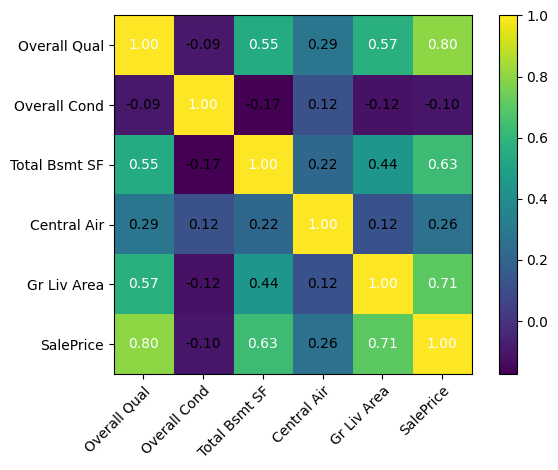

In [13]:
import numpy as np
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.values.T)
print(cm)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np

class LinearRegressionGD:

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)

        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)


In [16]:
# Extract feature and target values
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

print(X)
print(y)


[[1656]
 [ 896]
 [1329]
 ...
 [ 970]
 [1389]
 [2000]]
[215000 105000 172000 ... 132000 170000 188000]


In [19]:
# Standardize the feature and target
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
print(X_std)
print(y_std)


[[ 0.30887979]
 [-1.19492198]
 [-0.33815071]
 ...
 [-1.04849917]
 [-0.21942951]
 [ 0.98954796]]
[ 0.42783926 -0.94949293 -0.11057241 ... -0.61142048 -0.13561481
  0.08976682]


In [20]:
# Train the gradient descent-based linear regression
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

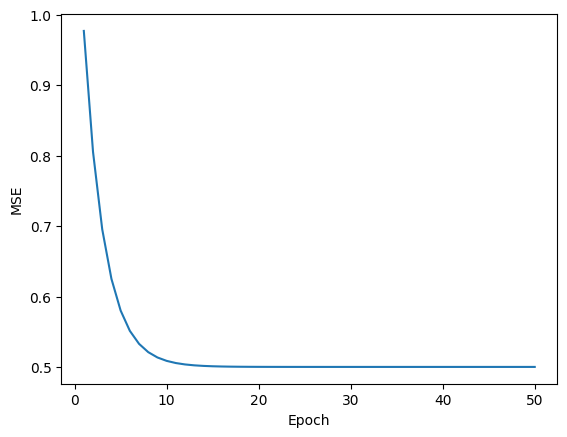

In [22]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()